In [290]:
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

pickle_file = 'housingNantes.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']

  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)

image_size = train_dataset.shape[1]

('Training set', (457, 56, 56), (457, 1))
('Validation set', (196, 56, 56), (196, 1))


In [291]:

price_equals_zero_list = []

for i,price in enumerate(train_labels):
    if price == 0:
        price_equals_zero_list.append(i)  

print len(price_equals_zero_list)   

new_dim = train_labels.shape[0]-len(price_equals_zero_list)

train_labels_no_zeros = np.zeros((new_dim, 1))
train_images_no_zeros = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(train_labels):
    if price != 0:
        train_labels_no_zeros[j][0] = price  
        j += 1

j = 0
for i,image in enumerate(train_dataset):
    if i not in price_equals_zero_list:
        train_images_no_zeros[j,:,:] = image  
        j += 1

        
        
# for validation:

price_equals_zero_list = []

for i,price in enumerate(valid_labels):
    if price == 0:
        price_equals_zero_list.append(i)  

print len(price_equals_zero_list)   

new_dim = valid_labels.shape[0]-len(price_equals_zero_list) 

valid_labels_no_zeros = np.zeros((new_dim, 1))
valid_images_no_zeros = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(valid_labels):
    if price != 0:
        valid_labels_no_zeros[j][0] = price  
        j += 1

j = 0
for i,image in enumerate(valid_dataset):
    if i not in price_equals_zero_list:
        valid_images_no_zeros[j,:,:] = image  
        j += 1        

11
6


In [292]:
train_labels = train_labels_no_zeros
valid_labels = valid_labels_no_zeros



In [293]:
# Jiggle images to change one pixel per row
import random

#jiggled_train_images = np.zeros((train_images_no_zeros.shape[0],train_images_no_zeros.shape[1],train_images_no_zeros.shape[2]))

jiggled_train_images = train_images_no_zeros.copy()
    
for j in range(train_images_no_zeros.shape[0]):

    for i in range(55):
        
        randone = random.randint(0,55)
        randtwo = random.randint(0,55)

        jiggled_train_images[j,randone,randtwo] = train_images_no_zeros[j,randtwo,randone]
        
jiggled_valid_images = valid_images_no_zeros.copy()
    
for j in range(valid_images_no_zeros.shape[0]):

    for i in range(300):
        
        randx = random.randint(0,55)
        randy = random.randint(0,55)

        jiggled_valid_images[j,randx,randy] = valid_images_no_zeros[j,randy,randx]        



In [294]:
# flip pixel row image
import cv2


flipped_train_images = np.zeros((train_images_no_zeros.shape[0],train_images_no_zeros.shape[1],train_images_no_zeros.shape[2]))

for j in range(train_images_no_zeros.shape[0]):
    
    flipped_train_images[j] = cv2.flip(train_images_no_zeros[j],1)
    
    
flipped_valid_images = np.zeros((valid_images_no_zeros.shape[0],valid_images_no_zeros.shape[1],valid_images_no_zeros.shape[2]))

for j in range(valid_images_no_zeros.shape[0]):
    
    flipped_valid_images[j] = cv2.flip(valid_images_no_zeros[j],1)


In [295]:
# flip jiggled image

flipped_jiggled_train_images = np.zeros((train_images_no_zeros.shape[0],train_images_no_zeros.shape[1],train_images_no_zeros.shape[2]))

for j in range(train_images_no_zeros.shape[0]):
    
    flipped_jiggled_train_images[j] = cv2.flip(jiggled_train_images[j],1)
    

flipped_jiggled_valid_images = np.zeros((valid_images_no_zeros.shape[0],valid_images_no_zeros.shape[1],valid_images_no_zeros.shape[2]))

for j in range(valid_images_no_zeros.shape[0]):
    
    flipped_jiggled_valid_images[j] = cv2.flip(jiggled_valid_images[j],1)

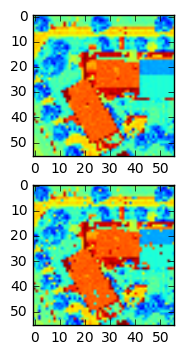

In [296]:
import matplotlib.pyplot as plt

sample_image = train_images_no_zeros[2, :, :]
jiggled_image = jiggled_train_images[2, :, :]  
flipped_image = flipped_train_images[2, :, :]  
flipped_jiggled_image = flipped_jiggled_train_images[2]


#plt.subplot(4,1,1)
#plt.imshow(sample_image) 
#plt.subplot(4,1,2)
#plt.imshow(jiggled_image) 
#plt.subplot(4,1,3)
#plt.imshow(flipped_image) 
#plt.subplot(4,1,4)
#plt.imshow(flipped_jiggled_image) 


sample_valid_image = valid_images_no_zeros[2, :, :]
jiggled_valid_image = jiggled_valid_images[2, :, :]  
flipped_valid_image = flipped_valid_images[2, :, :]  
flipped_valid_jiggled_image = flipped_jiggled_valid_images[2]

plt.subplot(2,1,1)
plt.imshow(sample_valid_image) 
plt.subplot(2,1,2)
plt.imshow(jiggled_valid_image) 
#plt.subplot(4,1,3)
#plt.imshow(flipped_valid_image) 
#plt.subplot(4,1,4)
#plt.imshow(flipped_valid_jiggled_image) 
plt.show()


In [297]:
# build training and validation sets with 4x more images

jiggle_flip_train_dim = train_images_no_zeros.shape[0]*4

jiggle_flip_train_images = np.zeros((jiggle_flip_train_dim,train_images_no_zeros.shape[1],train_images_no_zeros.shape[2]))

jiggle_flip_train_images[0:train_images_no_zeros.shape[0]] = train_images_no_zeros
jiggle_flip_train_images[train_images_no_zeros.shape[0]:train_images_no_zeros.shape[0]*2] = train_images_no_zeros
jiggle_flip_train_images[train_images_no_zeros.shape[0]*2:train_images_no_zeros.shape[0]*3] = jiggled_images
jiggle_flip_train_images[train_images_no_zeros.shape[0]*3:train_images_no_zeros.shape[0]*4] = flipped_jiggled_images


jiggle_flip_valid_dim = valid_images_no_zeros.shape[0]*4

jiggle_flip_valid_images = np.zeros((jiggle_flip_valid_dim,valid_images_no_zeros.shape[1],valid_images_no_zeros.shape[2]))

jiggle_flip_valid_images[0:valid_images_no_zeros.shape[0]] = valid_images_no_zeros
jiggle_flip_valid_images[valid_images_no_zeros.shape[0]:valid_images_no_zeros.shape[0]*2] = valid_images_no_zeros
jiggle_flip_valid_images[valid_images_no_zeros.shape[0]*2:valid_images_no_zeros.shape[0]*3] = jiggled_valid_images
jiggle_flip_valid_images[valid_images_no_zeros.shape[0]*3:valid_images_no_zeros.shape[0]*4] = flipped_jiggled_valid_images


In [298]:
# build training and validaiton labels

jiggle_flip_train_labels = np.zeros((jiggle_flip_train_dim,train_labels.shape[1]))

jiggle_flip_train_labels[0:train_labels.shape[0]] = train_labels
jiggle_flip_train_labels[train_labels.shape[0]:train_labels.shape[0]*2] = train_labels
jiggle_flip_train_labels[train_labels.shape[0]*2:train_labels.shape[0]*3] = train_labels
jiggle_flip_train_labels[train_labels.shape[0]*3:train_labels.shape[0]*4] = train_labels


jiggle_flip_valid_labels = np.zeros((jiggle_flip_valid_dim,valid_labels.shape[1]))

jiggle_flip_valid_labels[0:valid_labels.shape[0]] = valid_labels
jiggle_flip_valid_labels[valid_labels.shape[0]:valid_labels.shape[0]*2] = valid_labels
jiggle_flip_valid_labels[valid_labels.shape[0]*2:valid_labels.shape[0]*3] = valid_labels
jiggle_flip_valid_labels[valid_labels.shape[0]*3:valid_labels.shape[0]*4] = valid_labels


In [299]:
# reformat 
train_images = jiggle_flip_train_images.reshape((-1, image_size * image_size)).astype(np.float32)
valid_images = jiggle_flip_valid_images.reshape((-1, image_size * image_size)).astype(np.float32)

train_labels = jiggle_flip_train_labels
valid_labels = jiggle_flip_valid_labels

num_labels= 1

dtype = np.float32


In [ ]:
# add more info from json



In [309]:

graph = tf.Graph()
with graph.as_default():

  # Input data.
  # Load the training, validation into constants that are
  # attached to the graph.
    tf_train_images = tf.placeholder(dtype, shape=[None,image_size * image_size])
    tf_train_price = tf.placeholder(dtype, shape=[None,train_labels.shape[1]])
    tf_valid_images = tf.placeholder(dtype, shape=[None,image_size * image_size])
  
  # Variables.
  # These are the parameters that we are going to be training. The weight
  # matrix will be initialized using random values following a (truncated)
  # normal distribution. The biases get initialized to zero.
    weights = tf.Variable(
        tf.truncated_normal([image_size * image_size, num_labels]))
    biases = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  # We multiply the inputs with the weight matrix, and add biases. We compute
  # the loss as the difference between price estimated and real prices.
    
    price_estimation = tf.matmul(tf_train_images, weights) + biases
       
    #loss = tf.reduce_mean(tf.square(price_estimation - tf_train_price))/train_labels.shape[0]
    loss = tf.reduce_mean(tf.abs(price_estimation - tf_train_price))
    
  # Optimizer.
  # We are going to find the minimum of this loss using AdagradOptimizer.
  #  AdagradOptimizer
    #optimizer = tf.train.AdagradOptimizer(8).minimize(loss)
    optimizer = tf.train.MomentumOptimizer(30, 0.001).minimize(loss)
  
  # Predictions for the training and validation.
    train_prediction = price_estimation
    valid_prediction = tf.matmul(tf_valid_images, weights) + biases

In [310]:
num_steps = 3001

def accuracy(prediction, price):
  return np.mean(100 - 100*np.abs((prediction - price) / price))

with tf.Session(graph=graph) as session:
  # This is a one-time operation which ensures the parameters get initialized as
  # we described in the graph: random weights for the matrix, zeros for the
  # biases. 
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the loss value and the training predictions returned as numpy
    # arrays.
    _, l, predictions,valid_predictions = session.run([optimizer, loss, train_prediction,valid_prediction]
                                        , feed_dict={tf_train_images: train_images,tf_train_price: train_labels,tf_valid_images: valid_images })
    if (step % 100 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Training accuracy: %.1f%%' % accuracy(
        predictions, train_labels))
      # Calling .eval() on valid_prediction is basically like calling run(), but
      # just to get that one numpy array. Note that it recomputes all its graph
      # dependencies.
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_predictions, valid_labels))

Initialized
Loss at step 0: 269809.000000
Training accuracy: 0.0%
Validation accuracy: 0.0%
Loss at step 100: 201116.453125
Training accuracy: 27.3%
Validation accuracy: 27.0%
Loss at step 200: 190783.421875
Training accuracy: 29.3%
Validation accuracy: 29.9%
Loss at step 300: 184357.546875
Training accuracy: 31.0%
Validation accuracy: 31.4%
Loss at step 400: 179696.031250
Training accuracy: 31.8%
Validation accuracy: 32.0%
Loss at step 500: 176547.484375
Training accuracy: 32.5%
Validation accuracy: 32.6%
Loss at step 600: 174046.515625
Training accuracy: 33.4%
Validation accuracy: 33.4%
Loss at step 700: 171910.703125
Training accuracy: 33.9%
Validation accuracy: 34.0%
Loss at step 800: 170196.765625
Training accuracy: 34.5%
Validation accuracy: 34.6%
Loss at step 900: 168719.312500
Training accuracy: 34.9%
Validation accuracy: 35.0%
Loss at step 1000: 167457.906250
Training accuracy: 35.3%
Validation accuracy: 35.5%
Loss at step 1100: 166332.625000
Training accuracy: 35.6%
Validatio

In [304]:
predictions[0:100]

array([[ 191966.203125  ],
       [  78806.7109375 ],
       [ 217172.640625  ],
       [ -56997.3984375 ],
       [ 227722.0625    ],
       [ 154481.59375   ],
       [  98548.4453125 ],
       [ 354608.21875   ],
       [ 182804.703125  ],
       [ 295053.21875   ],
       [ 280916.28125   ],
       [ 114830.515625  ],
       [ 138886.546875  ],
       [ -69922.7890625 ],
       [ 102776.8671875 ],
       [ 171123.140625  ],
       [  90329.2890625 ],
       [ -56862.84375   ],
       [ 196319.5625    ],
       [ 224684.046875  ],
       [ 230120.8125    ],
       [ 236429.234375  ],
       [ 295560.5625    ],
       [  19712.62109375],
       [ 256996.703125  ],
       [  57907.3203125 ],
       [ -11671.12988281],
       [ 208820.359375  ],
       [ -40956.0234375 ],
       [ 199492.296875  ],
       [ 271872.28125   ],
       [ 249329.140625  ],
       [ 281788.5       ],
       [ 105684.6640625 ],
       [ 298788.0625    ],
       [ 142668.578125  ],
       [  79952.8515625 ],
 